In [1]:
import pandas as pd
import numpy as np
import json 
import os
import sys
import matplotlib.pyplot as plt
import shutil
from datetime import date

In [2]:
#NLP libraries 
import nltk

In [4]:
def getAbstract(jsonData):
    abstract=""
    for j in range(len(jsonData['documents'][0]['passages'])):
        if jsonData['documents'][0]['passages'][j]['infons']['section_type']=="ABSTRACT" and jsonData['documents'][0]['passages'][j]['infons']['type']=='abstract':
            abstract=abstract+" "+jsonData['documents'][0]['passages'][j]['text']
        else:
            continue
    return abstract

def getParagrpahs(jsonData):
    contents=""
    for j in range(len(jsonData['documents'][0]['passages'])):
        if jsonData['documents'][0]['passages'][j]['infons']['type']=="paragraph":
            contents=contents+"\n"+jsonData['documents'][0]['passages'][j]['text']
    
    return contents.strip()

In [6]:
def getIntroduction(jsonData):
    intro=""
    for j in range(len(jsonData['documents'][0]['passages'])):
        if jsonData['documents'][0]['passages'][j]['infons']['section_type']=="INTRO" and jsonData['documents'][0]['passages'][j]['infons']['type']=='paragraph':
            intro=intro+jsonData['documents'][0]['passages'][j]['text']+"\n"
    
    return intro

def getResults(jsonData):
    results=""
    for j in range(len(jsonData['documents'][0]['passages'])):
        if jsonData['documents'][0]['passages'][j]['infons']['section_type']=="RESULTS" and jsonData['documents'][0]['passages'][j]['infons']['type']=='paragraph':
            results=results+jsonData['documents'][0]['passages'][j]['text']+"\n"
            
    return results

def getMethods(jsonData):
    methods=""
    for j in range(len(jsonData['documents'][0]['passages'])):
        if jsonData['documents'][0]['passages'][j]['infons']['section_type']=="METHODS" and jsonData['documents'][0]['passages'][j]['infons']['type']=='paragraph':
            methods=methods+jsonData['documents'][0]['passages'][j]['text']+"\n"
            
    return methods

In [7]:
def getDate(jsonData):
    year=int(jsonData['date'][0:4])
    month=int(jsonData['date'][4:6])
    day=int(jsonData['date'][6:8])
    publishedDate=date(year=year,month=month,day=day)
    return publishedDate

def getTitle(jsonData):
    if jsonData['documents'][0]['passages'][0]['infons']['section_type']== 'TITLE':
        return jsonData['documents'][0]['passages'][0]['text']
    else:
        return "No Title"

def getAuthors(jsonData):
    authorList=[]
    for k in jsonArticle['documents'][0]['passages'][0]['infons'].keys():
        if 'name' in k:
            namesData=jsonArticle['documents'][0]['passages'][0]['infons'][k].split(';')
            fullname=""
            for name in namesData:
                fullname=fullname+' '+ name.split(':')[1]
            authorList.append(fullname)
        else:
            continue
    return authorList

In [6]:
os.chdir("C:/")

In [7]:
downloadPath=r"C:\Users\aberhe\Desktop\PostDoc\Projects\SANTAL\Datasets\Articles\Predomics\Included Articles"

listFolders=os.listdir(downloadPath)
folders=['Alistipes', 'Cirrhosis', 'Diabetes', 'Fabry', 'IBD', 'Lachnospiraceae', 
         'Megasphaera', 'Obesity', 'Streptococcus', 'Subdoligranulum', 'Veillonella']

bacteriaList=['Alistipes','Lachnospiraceae','Megasphaera','Streptococcus', 'Subdoligranulum','Veillonella']
diseaseList=["Cirrhosis","IBD","Diabetes","Obesity"]

In [8]:
listFolders

['Alistipes',
 'Cirrhosis',
 'Diabetes',
 'IBD',
 'Lachnospiraceae',
 'Megasphaera',
 'Obesity',
 'Streptococcus',
 'Subdoligranulum',
 'Veillonella']

In [9]:
file=open(downloadPath+"\\"+bacteriaList[1]+"\\"+os.listdir(downloadPath+"\\"+bacteriaList[1])[-2])
jsonArticle=json.load(file)

In [10]:
title=getTitle(jsonArticle)
date=getDate(jsonArticle)
authorList=getAuthors(jsonArticle)
abstract=getAbstract(jsonArticle)
intro=getIntroduction(jsonArticle)
results=getResults(jsonArticle)
methods=getMethods(jsonArticle)

In [11]:
title

'Diet Is a Stronger Covariate than Exercise in Determining Gut Microbial Richness and Diversity'

In [12]:
authorList

[' Yun Eon-Joo',
 ' Imdad Saba',
 ' Jang Junho',
 ' Park Jinhan',
 ' So Byunghun',
 ' Kim Jin-Hee',
 ' Kang Chounghun']

In [13]:
print(abstract)

 Obesity is a common metabolic disorder caused by a sedentary lifestyle, and a high-fat and a high-glucose diet in the form of fast foods. High-fat diet-induced obesity is a major cause of diabetes and cardiovascular diseases, whereas exercise and physical activity can ameliorate these disorders. Moreover, exercise and the gut microbiota are known to be interconnected, since exercise can increase the gut microbial diversity and contribute to the beneficial health effects. In this context, we analyzed the effect of diet and exercise on the gut microbiota of mice, by next-generation sequencing of the bacterial V4 region of 16S rRNA. Briefly, mice were divided into four groups: chow-diet (CD), high-fat diet (HFD), high-fat diet + exercise (HFX), and exercise-only (EX). The mice underwent treadmill exercise and diet intervention for 8 weeks, followed by the collection of their feces and DNA extraction for sequencing. The data were analyzed using the QIIME 2 bioinformatics platform and R so

In [14]:
print(intro)

The obesity pandemic has been the largest contributor to ill health according to the World Health Organization (WHO). According to the latest WHO fact sheets, more than 1.9 billion adults and 600 million individuals have been classified as overweight or obese worldwide, respectively, and these rates are projected to increase at a faster pace in the coming decades. Obesity is caused by a combination of genetic and environmental factors including genetic predisposition, the disruption of energy metabolism, and environmental and social factors. A high-fat diet (HFD) and inadequate physical activity are major environmental factors causing obesity, while genetics also plays an important role in terms of body weight homeostasis. Obesity is, therefore, expected to place a serious burden on the public healthcare system. Coronary artery disease risk factors and obesity are positively correlated. Obesity causes several changes in the body, including the induction of inflammation, oxidative stres

In [15]:
print(results)

The body weight and food intake of each mouse were recorded once a week for 8 weeks. Table 1 shows the average initial and final body weights of the mice at the end of the experiment. After the 8-week intervention, the HFD group showed a significant increase in the final body weight compared to the CD group (p < 0.0001). As expected, the HFD group mice showed a higher body weight than the mice in the EX group (p = 0.0003). Similarly, the HFX group mice gained significantly more weight than the CD group mice (p = 0.0046). However, the CD and EX groups showed similar weight gain after 8 weeks. HFD can induce weight gain and increase body fat content in mice, as reported previously. The mice in the HFX group weighed less on average compared to HFD-fed mice; however, no significant difference was recorded in weight gain between the HFD and HFX groups. The average food intake of the groups is shown in Table 1, with no significant differences observed among the groups.
The gut microbial rich

In [16]:
print(methods)

Four-week-old C57BL/6 female mice (n = 5) were randomly assigned to four groups, namely chow diet (CD), high-fat diet (HFD), high-fat diet + exercise (HFX), and exercise-only (EX) groups. Normal mice were fed a standard rodent chow diet (protein 18%, fat 5%, fiber 5%, ash 5% of total weight) and HFD mice were fed a high-fat diet (protein 20.5%, fat 34.9%, fiber, ash 8.0%, calcium, phosphorus 0.5% of total weight). The mice were housed in sterile cages, at a temperature of 22 ± 2 °C and relative humidity of 50 ± 10%, under 12 h light/dark cycle. After 8 weeks of diet and treadmill exercise intervention, the mice were fasted for 12 h and sacrificed by isoflurane overdose in a random order. The body weight of the mice was recorded every week until the last week. Fecal samples from individual mice were collected by restraint, in sterile microcentrifuge tubes, snap frozen, and stored at −80 °C, until further processing. The design of the study is presented in Figure 1.
The mice were housed 

In [30]:
print(listFiles)

['Alistipes', 'Cirrhosis', 'Diabetes', 'IBD', 'Lachnospiraceae', 'Megasphaera', 'Obesity', 'Streptococcus', 'Subdoligranulum', 'Veillonella']


In [11]:
downloadPath+folders[0]+'/'+os.listdir(downloadPath+folders[0])[-2]

'downloadedArticles/Alistipes/PMC9230770.json'

In [141]:
for k in jsonArticle['documents'][0]['passages'][0]['infons'].keys():
    if 'name' in k:
        namesData=jsonArticle['documents'][0]['passages'][0]['infons'][k].split(';')
        fullname=""
        for name in namesData:
            fullname=fullname+' '+ name.split(':')[1]
        print(fullname)
    else:
        continue

 Jiang Yamei
 Cai Chengzhe
 Zhang Pingbao
 Luo Yongsheng
 Guo Jingjing
 Li Jiawei
 Rong Ruiming
 Zhang Yi
 Zhu Tongyu


In [102]:
jsonArticle

{'source': 'PMC',
 'date': '20220625',
 'key': 'pmc.key',
 'infons': {},
 'documents': [{'id': '9225714',
   'infons': {'license': 'CC BY'},
   'passages': [{'offset': 0,
     'infons': {'alt-title': 'Y. Jiang et al.',
      'article-id_doi': '10.1080/0886022X.2022.2061998',
      'article-id_pmc': '9225714',
      'article-id_pmid': '35699239',
      'article-id_publisher-id': '2061998',
      'fpage': '660',
      'issue': '1',
      'kwd': '18β-Glycyrrhetinic acid kidney fibrosis ischemia reperfusion injury transcriptional profile RNA-seq',
      'license': 'This is an Open Access article distributed under the terms of the Creative Commons Attribution License (http://creativecommons.org/licenses/by/4.0/), which permits unrestricted use, distribution, and reproduction in any medium, provided the original work is properly cited.',
      'lpage': '671',
      'name_0': 'surname:Jiang;given-names:Yamei',
      'name_1': 'surname:Cai;given-names:Chengzhe',
      'name_2': 'surname:Zhang;

In [85]:
jsonArticle['date'][0:4],jsonArticle['date'][4:6],jsonArticle['date'][6:8]

('2022', '06', '25')

In [8]:
from datetime import datetime
from datetime import timedelta

In [30]:
abstract=getAbstract(jsonArticle)

In [31]:
contents=getParagrpahs(jsonArticle)

In [32]:
print(abstract)

 Abstract The vascular wall is comprised of distinct layers controlling angiogenesis, blood flow, vessel anchorage within organs, and cell and molecule transit between blood and tissues. Moreover, some blood vessels are home to essential stem-like cells, a classic example being the existence in the embryo of hemogenic endothelial cells at the origin of definitive hematopoiesis. In recent years, microvascular pericytes and adventitial perivascular cells were observed to include multi-lineage progenitor cells involved not only in organ turnover and regeneration but also in pathologic remodeling, including fibrosis and atherosclerosis. These perivascular mesodermal elements were identified as native forerunners of mesenchymal stem cells. We have presented in this brief review our current knowledge on vessel wall-associated tissue remodeling cells with respect to discriminating phenotypes, functional diversity in health and disease, and potential therapeutic interest. Graphical Abstract Co

In [90]:
#print(contents)

In [70]:
print("Number of sentences: {} \nNumber of words: {} \nNumber of unique word: {}\nNumber of characters: {}"
      .format(len(nltk.sent_tokenize(contents)),len(contents.split()), len(set(contents.split())),len(contents)))

Number of sentences: 119 
Number of words: 2563 
Number of unique word: 893
Number of characters: 17031


In [69]:
#nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aberhe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [9]:
def cleanText(stringToClean):
    cleanString=stringToClean.strip()
    
    
    return cleanString

def readDownlodedFiles(foldername):
    files=[]
    allfiles=os.listdir(downloadPath+foldername)
    for file in allfiles:
        if 'pdf_url' not in file:
            files.append(file)
    return files

In [66]:
files=readDownlodedFiles(folders[0])

In [67]:
len(files)

871

In [29]:
def getContentStastics(content):
    nb_sents=len(nltk.sent_tokenize(content))
    nb_words=len(content.split())
    nb_uniqueWords=len(set(content.split()))
    nb_charcacters=len(content)
    
    return nb_charcacters,nb_uniqueWords,nb_words,nb_sents

In [57]:
for folder in ["Megasphaera","Alistipes"]:
    print(folder)
    df=pd.DataFrame(columns=("nb_characters","nb_uniqueWords","nb_words","nb_sentences"))
    dfAbst=pd.DataFrame(columns=("nb_characters","nb_uniqueWords","nb_words","nb_sentences"))
    files=readDownlodedFiles(folder)
    for file in files:
        #print(downloadPath+folder+'/'+file)
        f=open(downloadPath+folder+'/'+file)
        jsondata=json.load(f)
        abst=getAbstract(jsondata)
        cont=getParagrpahs(jsondata)
        absStastics=getContentStastics(abst)
        contentStastics=getContentStastics(cont)
        #contentStastics=contentStastics.insert(0,folder)
        #absStastics=absStastics.insert(0,folder)
        #print(contentStastics)
        df.loc[len(df)] = contentStastics
        dfAbst.loc[len(dfAbst)] = absStastics
    
    df.to_csv(folder+'_Stastics_NEW.csv')
    dfAbst.to_csv(folder+'_Abstract_Stastics_NEW.csv')

Megasphaera
Alistipes


In [58]:
readDF=pd.read_csv("Cirrhosis_Abstract_Stastics_NEW.csv")

In [64]:
fs=folders+["Megasphaera","Alistipes"]
newDF=pd.DataFrame(columns=("terms","nb_articles","nb_characters","nb_sentences","nb_words","nb_uniqueWords","xax_nb_words","min_nb_words"))
for folder in fs: 
    readDF=pd.read_csv(folder+'_Stastics_NEW.csv')
    list_input=[folder,len(readDF),sum(readDF.nb_characters),sum(readDF.nb_sentences),sum(readDF.nb_words),sum(readDF.nb_uniqueWords),max(readDF.nb_words),max(readDF.nb_words)]
    #print(folder,sum(readDF.nb_characters),sum(readDF.nb_sentences),sum(readDF.nb_words),sum(readDF.nb_uniqueWords),max(readDF.nb_words),max(readDF.nb_words))
    newDF.loc[len(newDF)]=list_input
#newDF['terms']=folders

In [65]:
newDF

,terms,nb_articles,nb_characters,nb_sentences,nb_words,nb_uniqueWords,xax_nb_words,min_nb_words
0,Cirrhosis,871,24355193,163870,3595269,1196045,15602,15602
1,Diabetes,4526,118809578,790010,17728619,5842101,20546,20546
2,Obesity,1699,46853347,307600,7012733,2286036,17554,17554
3,IBD,3593,98497438,648350,14679048,4804470,62171,62171
4,Fabry,1576,35817350,245906,5478511,1814365,19455,19455
5,Lachnospiraceae,1145,36774701,238711,5455915,1792211,15884,15884
6,Megasphaera_micronuciformis,4,120704,808,17373,5770,5557,5557
7,Streptococcus,816,22080703,147059,3301165,1098214,13815,13815
8,Subdoligranulum,82,2398093,15736,355144,118555,10247,10247
9,Veillonella,633,17574361,114751,2599425,873611,10580,10580


In [83]:
prunDF=newDF.drop(newDF.index[6])

<AxesSubplot:xlabel='terms'>

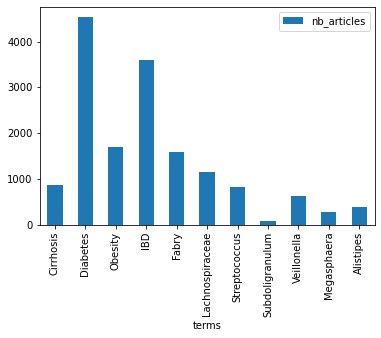

In [84]:
prunDF.plot(x='terms', y='nb_uniqueWords',kind='bar')

<AxesSubplot:xlabel='terms'>

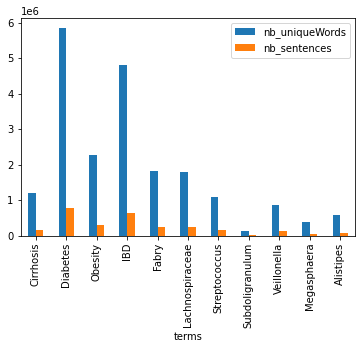

In [90]:
prunDF.plot(x='terms', y=['nb_uniqueWords','nb_sentences'],kind='bar')

In [88]:
prunDF.sum(axis=0)

terms             CirrhosisDiabetesObesityIBDFabryLachnospiracea...
nb_articles                                                   15589
nb_characters                                             422819623
nb_sentences                                                2800943
nb_words                                                   63120555
nb_uniqueWords                                             20789368
xax_nb_words                                                 209897
min_nb_words                                                 209897
dtype: object

In [11]:
def inclusionCriteria(bacteriaSignatures,disease):
    #Check for the dates: Articles after 2015
    #Check if the bacteria exits and the disease
    downloadPath="downloadedArticles/"
    includedList=[]
    for file in os.listdir(downloadPath+disease):
        if 'pdf' in file:
            continue
        if 'Abstract_' in file:
            continue
        else:
            #print(downloadPath+disease+'/'+file)
            f=open(downloadPath+disease+'/'+file)
            jsonData=json.load(f)

            abstracts=getAbstract(jsonData)
            if bacteriaSignatures in abstracts:
                includedList.append(file)
                continue
            contents=getParagrpahs(jsonData)
            if bacteriaSignatures in contents:
                includedList.append(file)
                continue
    if not os.path.exists(downloadPath+'Included Articles'+'/'+disease):
    #os.mkdir(downloadPath+'Included Articles')
        os.mkdir(downloadPath+'Included Articles'+'/'+disease)
        os.mkdir(downloadPath+'Included Articles'+'/'+disease+'/'+bacteriaSignatures)
    else:
        if not os.path.exists(downloadPath+'Included Articles'+'/'+disease+'/'+bacteriaSignatures):
            os.mkdir(downloadPath+'Included Articles'+'/'+disease+'/'+bacteriaSignatures)
    for incFile in includedList:
        shutil.copy(downloadPath+disease+'/'+incFile, downloadPath+'Included Articles'+'/'+disease+'/'+bacteriaSignatures+'/'+incFile)

    return includedList

In [20]:
import articleDetails as ad

In [79]:
def inclusionCriteria_all_terms(articles_path,term_or_signature):
    #Check for the dates: Articles after 2015
    #Check if the bacteria and the diseas exits
    #Check if the diseas exist in the abstarct 
    
    df=pd.DataFrame(columns=["term","PMID","Title","Authors","nb_characters","nb_words","nb_uniqueWords","nb_sentences","in_Abstract"])
    for file in os.listdir(os.path.join(articles_path,term_or_signature)):
        if 'pdf' in file:
            continue
        if 'Abstract_' in file:
            continue
        else:
            #print(downloadPath+disease+'/'+file)
            f=open(os.path.join(articles_path,term_or_signature)+'/'+file)
            jsonData=json.load(f)
            articleDetail=ad.ArticleDetails(jsonData)
            nb_charcacters,nb_uniqueWords,nb_words,nb_sents=getContentStastics(articleDetail.getParagrpahs())
            if "cirrhosis" in articleDetail.getAbstract().lower():
                df.loc[len(df)]=[term_or_signature,file.split(".")[0],articleDetail.getTitle(),articleDetail.getAuthors(),nb_charcacters,nb_words,nb_uniqueWords,nb_sents,1]
                continue
            elif "cirrhosis" in articleDetail.getParagrpahs().lower():
                df.loc[len(df)]=[term_or_signature,file.split(".")[0],articleDetail.getTitle(),articleDetail.getAuthors(),nb_charcacters,nb_words,nb_uniqueWords,nb_sents,0]
                continue
    return df

In [ ]:
def distantSupervision(disease):
    downloadPath="downloadedArticles/Included Articles/"+disease
    diseaseCount=0
    for file in os.listdir(downloadPath):
        articleData=ad.ArticleDetails
        

In [182]:
for i in range(len(bacteriaList)):
    for j in range(len(diseaseList)):
        includedList=inclusionCriteria(bacteriaSignatures=bacteriaList[i],disease=diseaseList[j])
        #f=open(downloadPath+diseaseList[j]+'/'+file)
        #jsonData=json.load(f)

In [ ]:
includedList

In [49]:
#import articleDetails.ArticleDetails as add
import articleDetails as ad 

In [11]:
articleData=ad.ArticleDetails(jsonArticle)

In [12]:
articleData.getDetails()

In [26]:
print(articleData.fullArticle)

 Chronic kidney disease (CKD) is characterized by renal fibrosis without effective therapy. 18β-Glycyrrhetinic acid (GA) is reported to have detoxification and anti-inflammatory functions and promotes tissue repair. However, the role of GA in CKD remains unclear. In this study, we investigated whether GA has a potential therapeutic effect in kidney fibrosis. A renal fibrosis mouse model was established by ischemia/reperfusion (I/R) injury via clamping unilateral left renal pedicle for 45 min; then, the mice were treated with vehicle or GA. Kidney tissues and blood samples were extracted 14 days after reperfusion and renal function, histopathological staining, quantitative PCR, and western blotting were performed. RNA-seq was performed to explore the changes in the transcriptional profile after GA treatment. Renal function, pathological and molecular analysis displayed that fibrosis was successfully induced in the I/R model. In the GA treatment group, the severity of fibrosis gradually 

In [50]:
path_terms="new_articles"
term_list=os.listdir(path_terms)

In [1]:
#os.listdir(os.path.join(path_terms,term_list[0]))

In [56]:
f=open(os.path.join(path_terms,term_list[0])+'/'+"PMC9792139.json")
jsonData=json.load(f)

In [57]:
articleDetail=ad.ArticleDetails(jsonData)

In [78]:
articleDetail.getTitle()

'Effects of Lactobacillus plantarum and Pediococcus acidilactici co-fermented feed on growth performance and gut microbiota of nursery pigs'

In [2]:
#jsonData

In [123]:
from tqdm import tqdm
merged_df=pd.DataFrame(columns=df.columns.tolist())
for term in tqdm(term_list):
    #df=inclusionCriteria_all_terms(path_terms,term)
    df_r=pd.read_csv("new_included_list/"+term+".csv")
    merged_df=merged_df=pd.concat((merged_df,df_r),axis=0)

100%|██████████| 108/108 [00:00<00:00, 125.75it/s]


In [124]:
merged_df.shape

(3109, 11)

In [125]:
merged_df=pd.concat((merged_df,df_r),axis=0)

In [131]:
merged_df.shape

(3117, 11)

In [130]:
merged_df.head(10)

,term,articles,Unnamed: 0,PMID,Title,Authors,nb_characters,nb_words,nb_uniqueWords,nb_sentences,in_Abstract
0,Acidaminococcus,NaN,0.0,PMC6407135,Alterations of the Gut Microbiome in Chronic H...,"[' Yun Yeojun', ' Chang Yoosoo', ' Kim Han-Na'...",21206.0,3087.0,1136.0,153.0,0.0
1,Acidaminococcus,NaN,1.0,PMC8318216,An Exploratory Study for the Association of Gu...,"[' Shen Ying-Chun', ' Lee Pei-Chang', ' Shao Y...",24379.0,3488.0,1339.0,148.0,0.0
2,Acidaminococcus,NaN,2.0,PMC8911313,Compositional Alterations of Gut Microbiota in...,"[' He Xin', ' Sun Jiping', ' Liu Chao', ' Yu X...",17670.0,2583.0,995.0,115.0,0.0
0,Actinobacillus,NaN,0.0,PMC3173953,Synergistic Antibacterial Effect between Silib...,"[' Lee Young-Soo', ' Jang Kyeung-Ae', ' Cha Je...",8691.0,1267.0,567.0,49.0,0.0
1,Actinobacillus,NaN,1.0,PMC5061073,Actinobacillus ureae: an unusual cause of tree...,"[' Dawar R.', ' Nagarjuna D.', ' Gupta R.', ' ...",11686.0,1720.0,771.0,98.0,0.0
2,Actinobacillus,NaN,2.0,PMC5476624,Gut microbiota of liver transplantation recipi...,"[' Sun Li-Ying', ' Yang Yun-Sheng', ' Qu Wei',...",23846.0,3550.0,1322.0,153.0,0.0
3,Actinobacillus,NaN,3.0,PMC6309737,Comparison of Oropharyngeal Microbiota in Heal...,"[' Wang Qun', ' Cai Rujian', ' Huang Anni', ' ...",25188.0,3693.0,1278.0,160.0,0.0
4,Actinobacillus,NaN,4.0,PMC6822888,Escherichia coli-associated Infective Endocard...,"[' Muacevic Alexander', ' Adler John R', ' Anj...",7761.0,1178.0,598.0,69.0,0.0
5,Actinobacillus,NaN,5.0,PMC7362456,Dietary fermented soybean meal replacement all...,"[' Wang Wenwen', ' Wang Yuan', ' Hao Xiran', '...",28873.0,4318.0,1433.0,204.0,0.0
6,Actinobacillus,NaN,6.0,PMC7504581,Potential Associations Among Alteration of Sal...,"[' Ragusa Marco', ' Santagati Maria', ' Trovat...",37694.0,5356.0,2021.0,235.0,0.0


In [136]:
"PMC7062144" in merged_df.PMID.tolist()

False

In [134]:
merged_df.PMID.value_counts()

PMC5693892    12
PMC9135951    11
PMC8792969     9
PMC9126193     9
PMC7874275     8
              ..
PMC9199433     1
PMC8407486     1
PMC9209339     1
PMC7952914     1
PMC6321057     1
Name: PMID, Length: 1885, dtype: int64

In [107]:
merged_df.term.value_counts()

Helicobacter       230
Clostridium        176
Lactobacillus      175
Bifidobacterium    149
Klebsiella         134
                  ... 
Centipeda            1
Pedobacter           1
Gordonibacter        1
Cetobacterium        1
Dysgonomonas         1
Name: term, Length: 94, dtype: int64

<AxesSubplot:xlabel='term'>

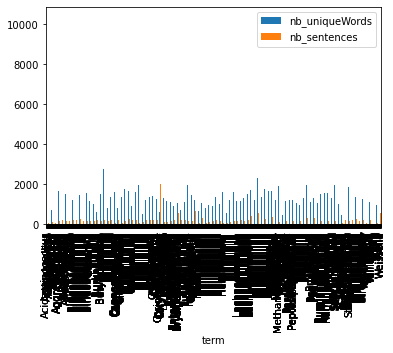

In [109]:
merged_df.plot(x='term', y=['nb_uniqueWords','nb_sentences'],kind='bar')

In [112]:
merged_df_sorted=merged_df.sort_values("nb_uniqueWords", ascending=False)

In [113]:
merged_top_20=merged_df_sorted.head(20)

<AxesSubplot:xlabel='term'>

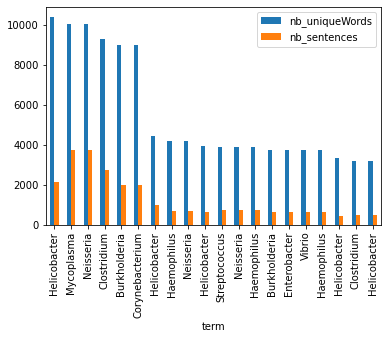

In [114]:
merged_top_20.plot(x='term', y=['nb_uniqueWords','nb_sentences'],kind='bar')

In [115]:
merged_top_20.term.value_counts()

Helicobacter       5
Neisseria          3
Haemophilus        3
Clostridium        2
Burkholderia       2
Mycoplasma         1
Corynebacterium    1
Streptococcus      1
Enterobacter       1
Vibrio             1
Name: term, dtype: int64

In [33]:
os.listdir(os.path.join(path_terms,term_list[0]))

['Abstract_PMID10027965.json',
 'Abstract_PMID10409616.json',
 'Abstract_PMID10425757.json',
 'Abstract_PMID10491198.json',
 'Abstract_PMID10653739.json',
 'Abstract_PMID10849007.json',
 'Abstract_PMID10952584.json',
 'Abstract_PMID10964512.json',
 'Abstract_PMID11036038.json',
 'Abstract_PMID11041350.json',
 'Abstract_PMID11106419.json',
 'Abstract_PMID11243821.json',
 'Abstract_PMID11248185.json',
 'Abstract_PMID11784332.json',
 'Abstract_PMID11967068.json',
 'Abstract_PMID11980491.json',
 'Abstract_PMID12324340.json',
 'Abstract_PMID12469301.json',
 'Abstract_PMID12576580.json',
 'Abstract_PMID12582423.json',
 'Abstract_PMID12610725.json',
 'Abstract_PMID12853465.json',
 'Abstract_PMID1385264.json',
 'Abstract_PMID1417419.json',
 'Abstract_PMID1419.json',
 'Abstract_PMID14653822.json',
 'Abstract_PMID15374661.json',
 'Abstract_PMID15634349.json',
 'Abstract_PMID1590689.json',
 'Abstract_PMID16349331.json',
 'Abstract_PMID163867.json',
 'Abstract_PMID16645308.json',
 'Abstract_PMID17

In [111]:
merged_df.to_csv("included_articles_list.csv")

In [120]:
path_files=r"C:\Users\aberhe\Desktop\PostDoc\Projects\SANTAL\codes\Article_Extraction\new_articles"
sum=0
df=pd.DataFrame(columns=["term","articles"])
for folder in os.listdir(path_files):
    sum=sum+len(os.listdir(os.path.join(path_files,folder)))
    df.loc[len(df)]=[folder,int(len(os.listdir(os.path.join(path_files,folder))))]

In [119]:
print(sum,int(sum/3))

648274 216091


In [121]:
df

,term,articles
0,Acidaminococcus,421
1,Actinobacillus,6144
2,Actinomyces,10350
3,Actinopolyspora,36
4,Adlercreutzia,366
...,...,...
103,Turicibacter,1043
104,Veillonella,3971
105,Vibrio,17504
106,Vicia,6414
